# Dataset testing

### 1. Train / Test Split (inherent to json dataset)

In [1]:
import json
from collections import Counter

label_file = "large_rock_dataset.json"

with open(label_file, 'r') as f:
    data = json.load(f)

splits = [tile.get('split', 'train') for tile in data['dataset']]  # Default to 'train' if missing
split_counts = Counter(splits)

for split, count in split_counts.items():
    print(f"{split.capitalize()}: {count} images")
    print(f"Percentage: {count / len(splits) * 100:.2f}%")

Train: 640 images
Percentage: 64.52%
Test: 352 images
Percentage: 35.48%


64 % is a bit low but if we use 10% of images from test split for validation and perform augmentation on training images could be enough --> to be monitored

### 2. Visualisation of YOLO - using Dataset.py
Following cell can be updated depending on which dataset we are using

In [2]:
from Dataset import LargeRocksDataset
from utils import *
image_folder = "swissImage_50cm_patches"  # Path to swissImage_50cm_patches or equivalent
label_file = "large_rock_dataset.json"  # JSON file with annotations
output_path = "YOLO"  # Directory to save processed dataset

rocks_dataset = LargeRocksDataset(image_folder, label_file, output_path)
rocks_dataset.process_dataset()

Dataset (swissImage_50cm_patches) converted to YOLO format with train/val/test splits at YOLO


In [3]:
import os

# Define paths to the YOLO dataset splits
yolo_train_folder = "YOLO/images/train"
yolo_val_folder = "YOLO/images/val"
yolo_test_folder = "YOLO/images/test"

# Count the number of images in each split
train_count = len(os.listdir(yolo_train_folder))
val_count = len(os.listdir(yolo_val_folder))
test_count = len(os.listdir(yolo_test_folder))

print(f"Train set: {train_count} images")
print(f"Validation set: {val_count} images")
print(f"Test set: {test_count} images")

Train set: 640 images
Validation set: 166 images
Test set: 186 images


Visualisation: comparison of newly annotaded YOLO data with original data

In [4]:
import random

# Paths to the YOLO dataset
image_folder = "YOLO/images/train"
label_folder = "YOLO/labels/train"
json_file_path = 'large_rock_dataset.json'

# Load the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

train_data = [tile for tile in data['dataset'] if tile.get('split') == 'train']



rerun following cell for more images:

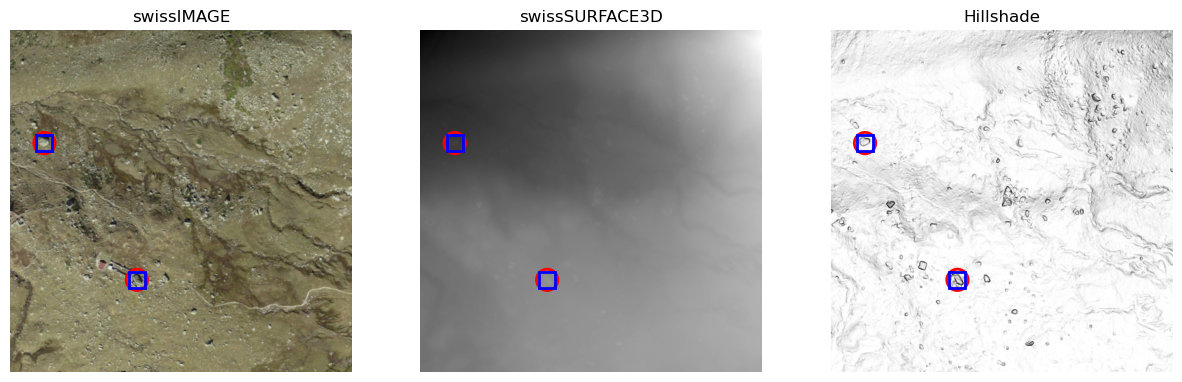

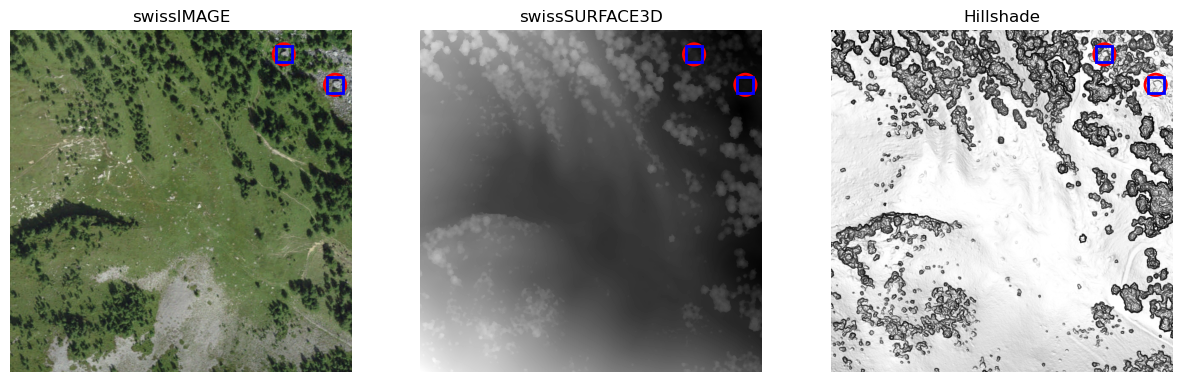

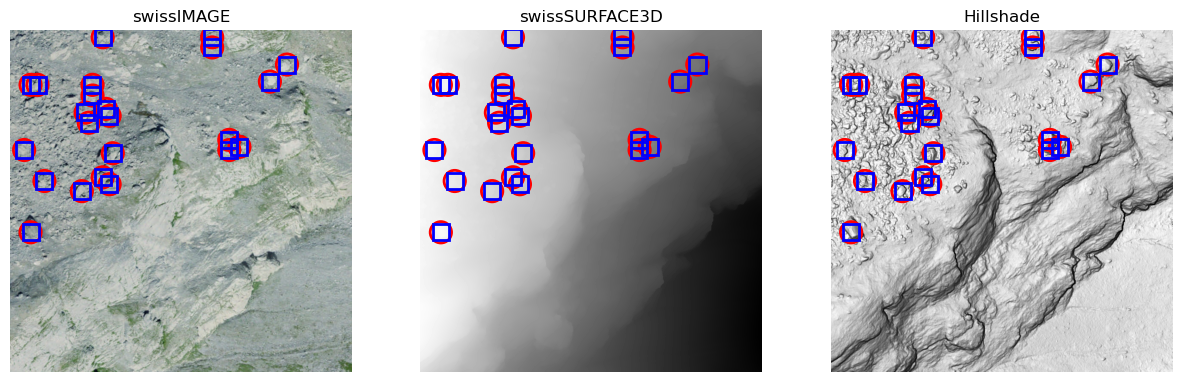

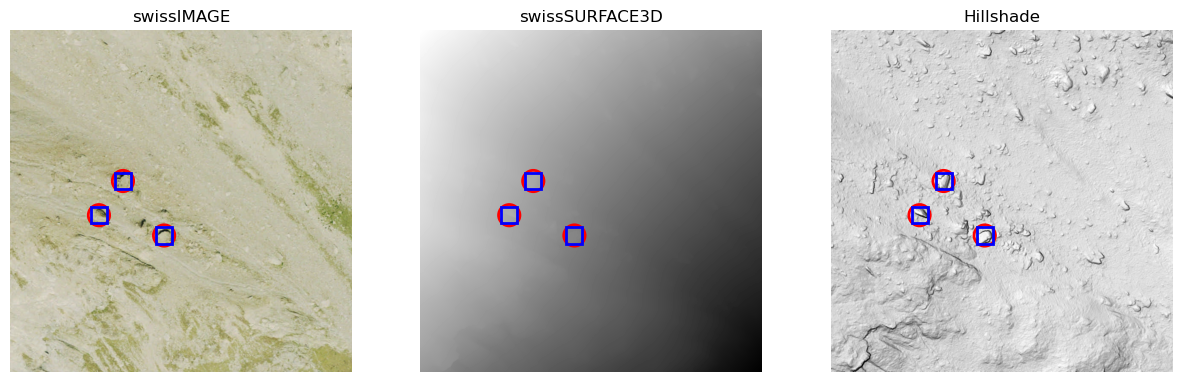

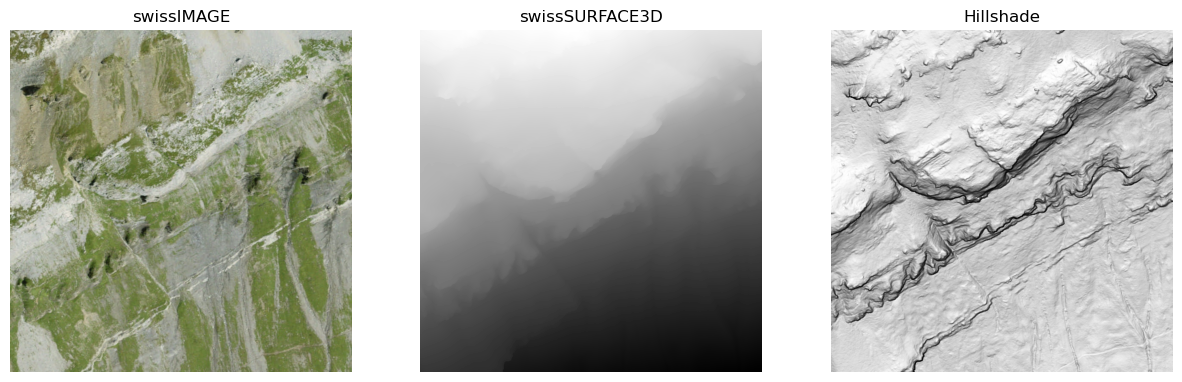

In [5]:
for k in range(5):  # Visualize 5 random samples
    random.shuffle(train_data)
    plot_images_with_comparison(train_data[k], label_folder="YOLO/labels/train")

Initial analysis shows that bbox size is never in the large_rock_dataset unlike what is written in Usefull_tips.ipynb, so the code defaults to the size I gave it. [10,10] was too small so I pushed it up to [30,30] to have a similar radius to the one provided

In [6]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.info()


YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients


(225, 3157200, 0, 0.0)

In [7]:
results = model.train(data="data.yml", epochs=1, batch=10, imgsz=640,device='mps')

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yml, epochs=1, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

train: Scanning /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/labels/train... 640 images, 320 backgrounds, 0 corrupt: 100%|██████████| 640/640 [00:00<00:00, 1839.18it/s]

train: WARNING ⚠️ /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/train/2582_1127_0_1.tif: 1 duplicate labels removed
train: WARNING ⚠️ /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/train/2588_1133_0_2.tif: 1 duplicate labels removed
train: WARNING ⚠️ /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/train/2588_1133_1_2.tif: 1 duplicate labels removed
train: WARNING ⚠️ /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/train/2598_1132_0_3.tif: 2 duplicate labels removed
train: WARNING ⚠️ /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/train/2598_1132_1_3.tif: 2 duplicate labels removed
train: WARNING ⚠️ /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/train/2704_1127_3_3.tif: 1 duplicate labels removed
train: New cache created: /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/labels/train.cache



val: Scanning /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/labels/val... 166 images, 54 backgrounds, 0 corrupt: 100%|██████████| 166/166 [00:00<00:00, 1290.40it/s]

val: WARNING ⚠️ /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/images/val/2626_1102_3_0.tif: 1 duplicate labels removed
val: New cache created: /Users/sam/EPFL/ENV-540 IPEO/IPEO_Project_Group_4/YOLO/labels/val.cache


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      2.743      3.571      1.462         54        640: 100%|██████████| 64/64 [05:02<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:35<00:00,  3.96s/it]


                   all        166        627      0.134      0.362       0.14     0.0497

1 epochs completed in 0.094 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CPU (Apple M1)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.61s/it]


                   all        166        627      0.132      0.362       0.14     0.0499
Speed: 1.0ms preprocess, 155.1ms inference, 0.0ms loss, 35.0ms postprocess per image
Results saved to runs/detect/train5
